In [4]:
import os
import pandas as pd
import numpy as np


PATH=os.getcwd()

val_path=os.path.join(PATH,'data/val_data.csv')
df_val=pd.read_csv(val_path)


test_path=os.path.join(PATH,'data/test_data.csv')
df_test=pd.read_csv(test_path)

tr_path = os.path.join(PATH,'data/tr_data.csv')
df_tr=pd.read_csv(tr_path)


In [5]:
RNG_SEED=42

df_val_sample=df_val.sample(n=200,random_state=RNG_SEED)
df_test_sample=df_test.sample(n=200,random_state=RNG_SEED)
df_tr_sample=df_tr.sample(n=2000,random_state=RNG_SEED)

In [6]:
from CBFV.cbfv.composition import generate_features   #导入包

rename_dict={'Cp':'target'}

df_val=df_val.rename(columns=rename_dict)
df_test=df_test.rename(columns=rename_dict)
df_tr=df_tr.rename(columns=rename_dict)

df_val_sample=df_val_sample.rename(columns=rename_dict)
df_test_sample=df_test_sample.rename(columns=rename_dict)
df_tr_sample=df_tr_sample.rename(columns=rename_dict)

In [38]:
#都分成什么数据了？
X_tr_unscaled, y_tr, formulae_tr, skipped_tr = generate_features(df_tr_sample, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = generate_features(df_val_sample, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test_sample, elem_prop='oliynyk', drop_duplicates=False, extend_features=True,sum_feat=True)

Assigning Features...:  25%|█████████████▋                                        | 507/2000 [00:00<00:00, 5022.74it/s]

	Featurizing Compositions...


Assigning Features...:   0%|                                                                   | 0/200 [00:00<?, ?it/s]

	Creating Pandas Objects...
	Featurizing Compositions...


Assigning Features...:   0%|                                                                   | 0/200 [00:00<?, ?it/s]

	Creating Pandas Objects...
	Featurizing Compositions...


Assigning Features...: 100%|███████████████████████████████████████████████████████| 200/200 [00:00<00:00, 3510.82it/s]

	Creating Pandas Objects...


In [8]:
#X_tr_unscaled.head()
print(y_tr)

0       159.779
1       402.041
2        50.000
3       133.779
4        60.961
         ...   
1995     93.303
1996     79.580
1997    425.513
1998     84.119
1999    188.100
Name: target, Length: 2000, dtype: float64


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [10]:
scaler = StandardScaler()

X_tr = scaler.fit_transform(X_tr_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [37]:
X_tr = normalize(X_tr)
X_val = normalize(X_val)
X_test = normalize(X_test)

[[-0.01067437 -0.0137351   0.02515243 ...  0.10557441  0.09194716
  -0.01347688]
 [ 0.09665077  0.07913035  0.16748877 ... -0.01600941 -0.01773366
  -0.01270419]
 [-0.07797639 -0.07792584 -0.09861866 ... -0.05969528 -0.06385878
  -0.14952252]
 ...
 [ 0.0966561   0.07913472  0.16749801 ... -0.01601029 -0.01773464
   0.00714549]
 [ 0.16169192  0.17503407  0.04679666 ... -0.04334183 -0.04514891
  -0.03206229]
 [-0.01961067 -0.02913398  0.06433673 ...  0.02296349  0.01479095
   0.05459093]]


In [12]:
from time import time
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [13]:
def instantiate_model(model_name):
    model=model_name()
    return model

def fit_model(model,X_tr,y_tr):
    ti=time()
    model= instantiate_model(model)
    model.fit(X_tr, y_tr)
    fit_time=time()-ti
    return model,fit_time

def evaluate_model(model,X,y_act):
    y_pred = model.predict(X)
    r2 =r2_score(y_act,y_pred)
    mae= mean_absolute_error(y_act,y_pred) #平均准确误差
    rmse_val = mean_squared_error(y_act,y_pred) #平均平方误差
    return r2,mae,rmse_val

def fit_evaluate_model(model,model_name,X_tr,y_tr,X_val,y_act_val):
    model,fit_time=fit_model(model,X_tr,y_tr)
    r2_tr,mae_tr,rmse_tr=evaluate_model(model,X_tr,y_tr)
    r2_val,mae_val,rmse_val=evaluate_model(model,X_val,y_act_val)
    result_dict={'model_name':model_name,
               'model_name_pretty':type(model).__name__,
               'model_params':model.get_params(),
               'fit_time':fit_time,
               'r2_tr':r2_tr,
               'mae_tr':mae_tr,
               'rmse_tr':rmse_tr,
               'r2_val':r2_val,
               'mae_val':mae_val,
               'rmse_val':rmse_val}
    return model, result_dict

def append_result_df(df,result_dict):
    df_result_append=df.append(result_dict,ignore_index=True)
    return df_result_append

def append_model_dict(dic,model_name,model):
    dic[model_name]=model
    return dic


df_classics = pd.DataFrame(columns=['model_name', 'model_name_pretty', 'model_params', 'fit_time', 'r2_tr', 'mae_tr', 'rmse_tr',
                                    'r2_val', 'mae_val','rmse_val'])

df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_tr,mae_tr,rmse_tr,r2_val,mae_val,rmse_val


In [14]:
from collections import OrderedDict

classic_model_names = OrderedDict({
 'dumr': DummyRegressor,
 'rr': Ridge,
 'abr': AdaBoostRegressor,
 'gbr': GradientBoostingRegressor,
 'rfr': RandomForestRegressor,
 'etr': ExtraTreesRegressor,
 'svr': SVR,
 'lsvr': LinearSVR,
 'knr': KNeighborsRegressor,
})

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


classic_models=OrderedDict()
ti=time()
for model_name,model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model,result_dict= fit_evaluate_model(model,model_name,X_tr,y_tr,X_val,y_val) 
    df_classics = append_result_df(df_classics,result_dict)
    classic_models = append_model_dict(classic_models,model_name,model)
    
dt =time()-ti
print(f'Finished fitting {len(classic_models)} models, total time:{dt:0.2f}s')

Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor
Now fitting and evaluating model gbr: GradientBoostingRegressor
Now fitting and evaluating model rfr: RandomForestRegressor


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Now fitting and evaluating model etr: ExtraTreesRegressor


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Now fitting and evaluating model svr: SVR


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Now fitting and evaluating model lsvr: LinearSVR
Now fitting and evaluating model knr: KNeighborsRegressor
Finished fitting 9 models, total time:16.58s


In [16]:
df_classics = df_classics.sort_values('r2_val',ignore_index=True)
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_tr,mae_tr,rmse_tr,r2_val,mae_val,rmse_val
0,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.000997,0.000000,52.356879,4819.191093,-0.010833,54.962249,5366.642905
1,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",1.543124,0.017495,47.457655,4734.877873,0.048049,48.999910,5054.030430
2,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.018989,0.711779,19.603524,1388.993394,0.658075,22.481295,1815.326082
3,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.054971,0.984733,4.151731,73.576057,0.659045,27.438445,1810.171649
4,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.014992,0.867587,16.916071,638.123145,0.807589,20.837314,1021.536914
5,abr,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",4.476562,0.925340,15.796549,359.801989,0.830717,22.989010,898.746822
6,rfr,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",2.633719,0.997245,1.717353,13.277457,0.848406,18.162027,804.830409
7,gbr,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",4.462527,0.988536,5.408686,55.245729,0.864035,16.869655,721.857539
8,etr,ExtraTreesRegressor,"{'bootstrap': False, 'criterion': 'mse', 'max_...",1.073894,0.999836,0.054262,0.789501,0.864842,17.236939,717.569487


In [17]:
classic_models

OrderedDict([('dumr',
              DummyRegressor(constant=None, quantile=None, strategy='mean')),
             ('rr',
              Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                 normalize=False, random_state=None, solver='auto', tol=0.001)),
             ('abr',
              AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                       n_estimators=50, random_state=None)),
             ('gbr',
              GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None, presort='auto',
                           random_state=None

In [33]:
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])
    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
 
    return plot

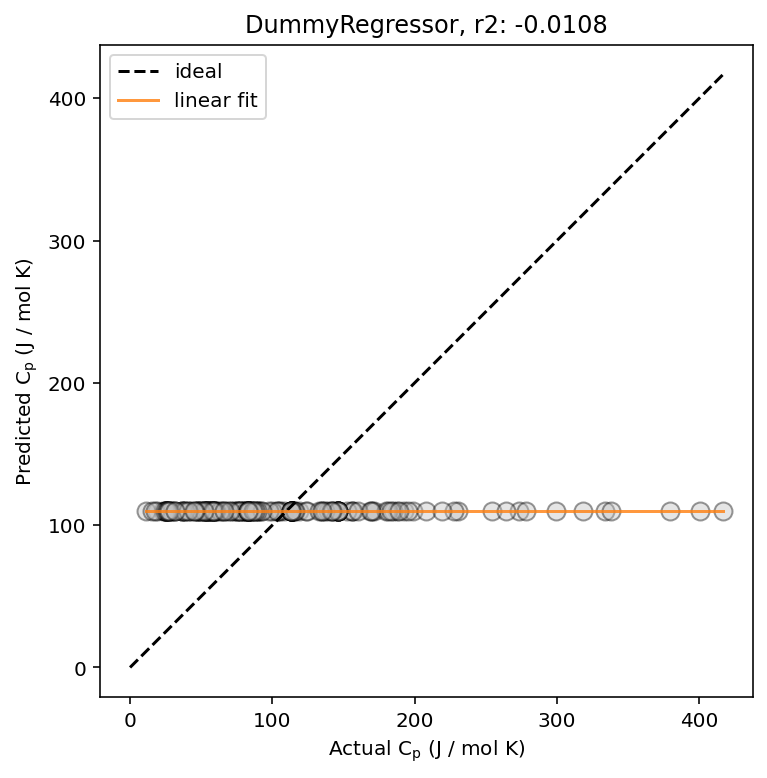

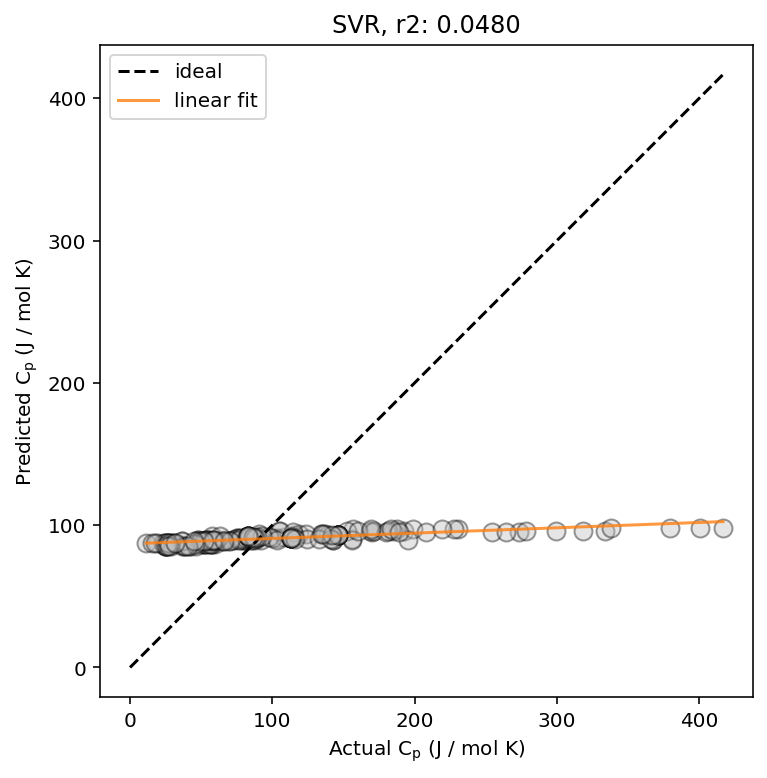

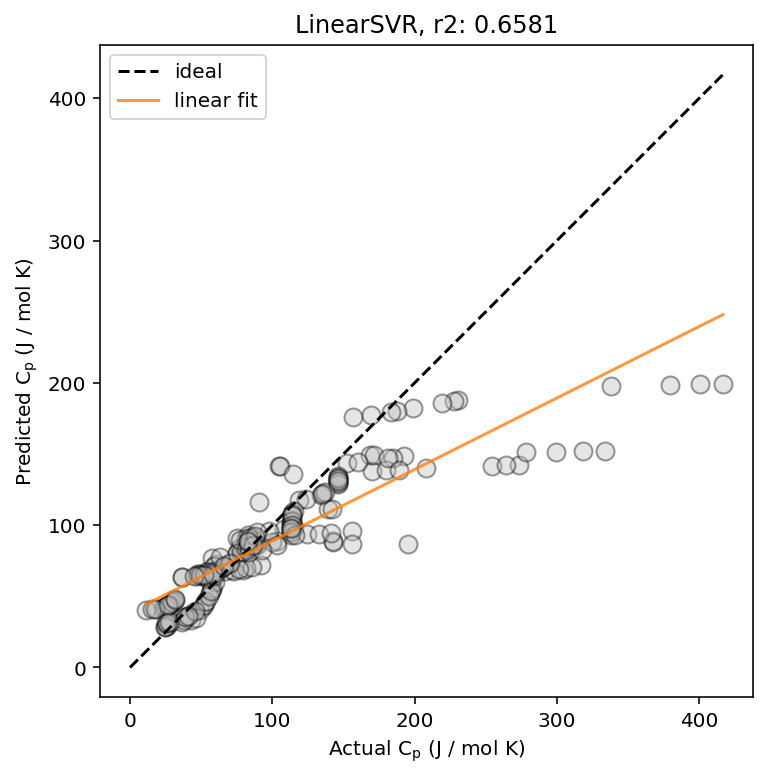

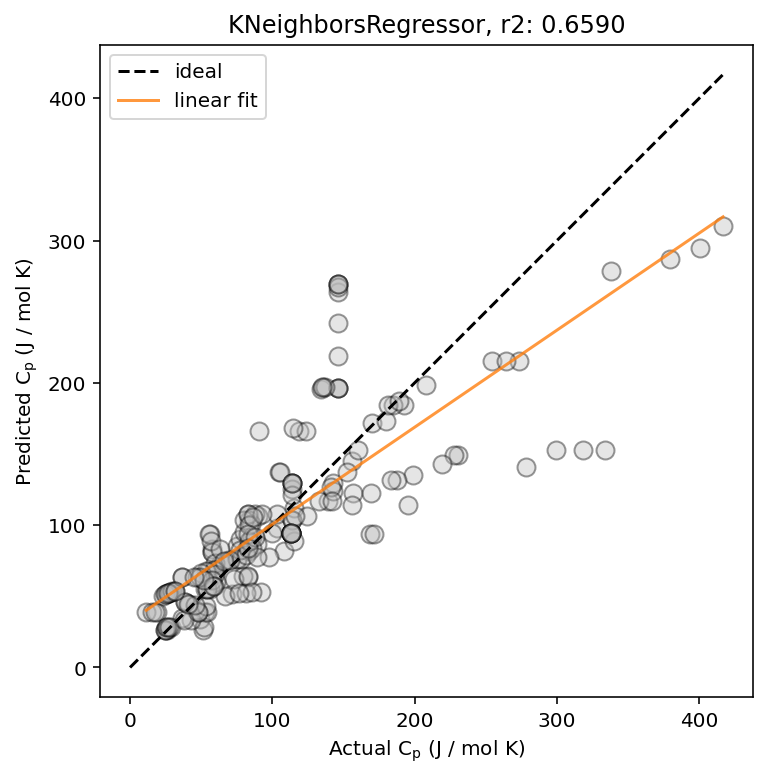

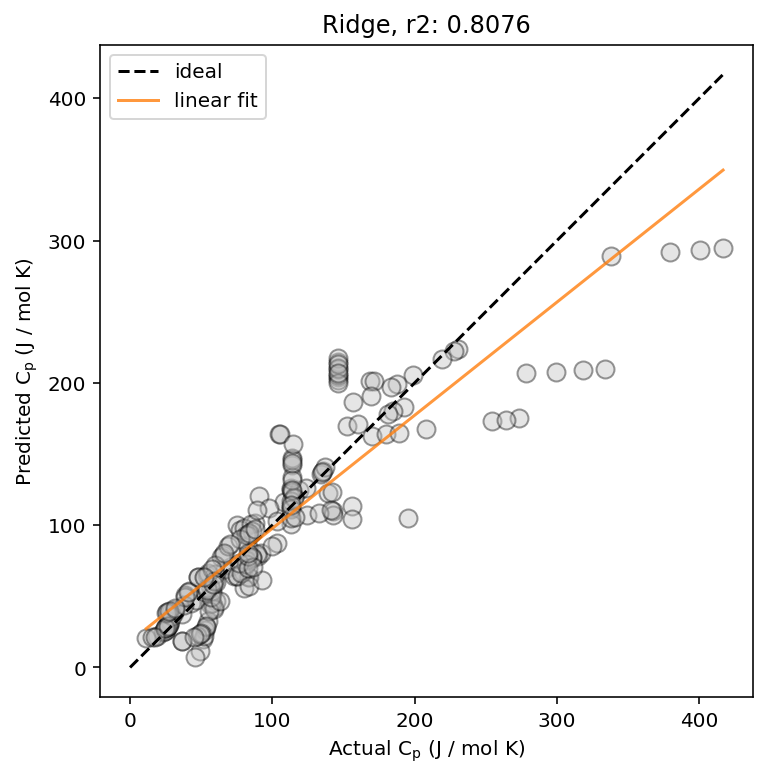

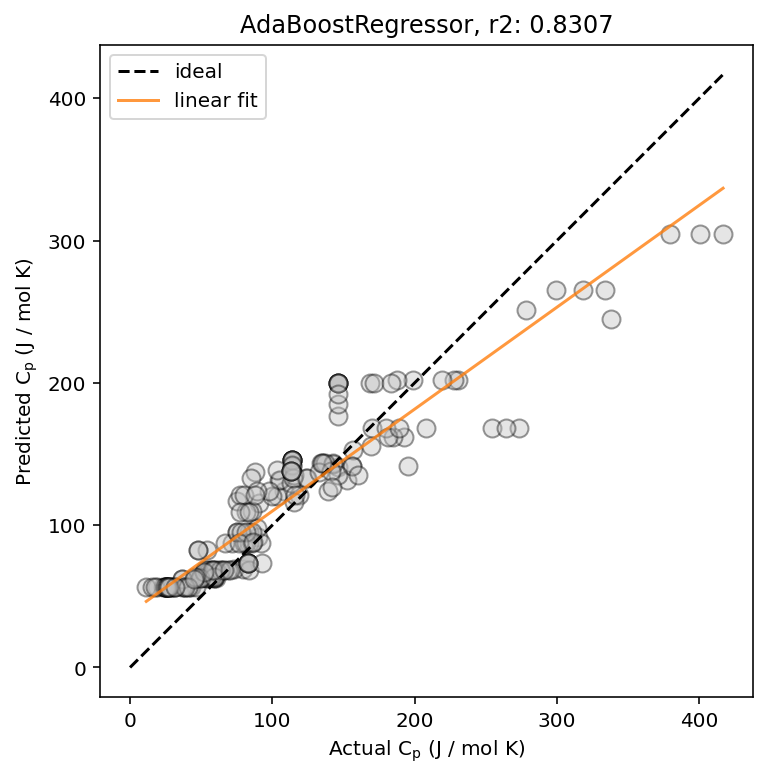

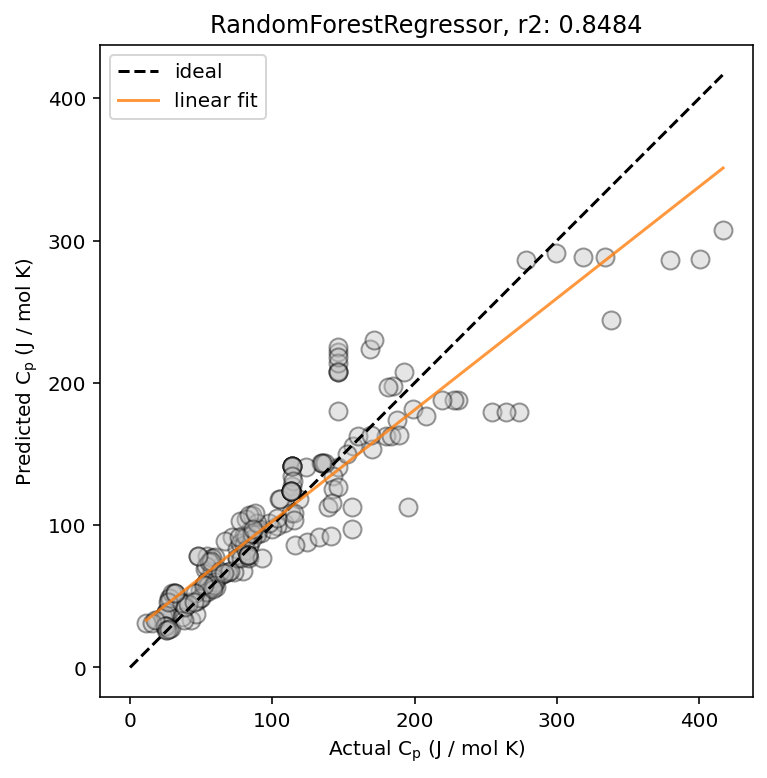

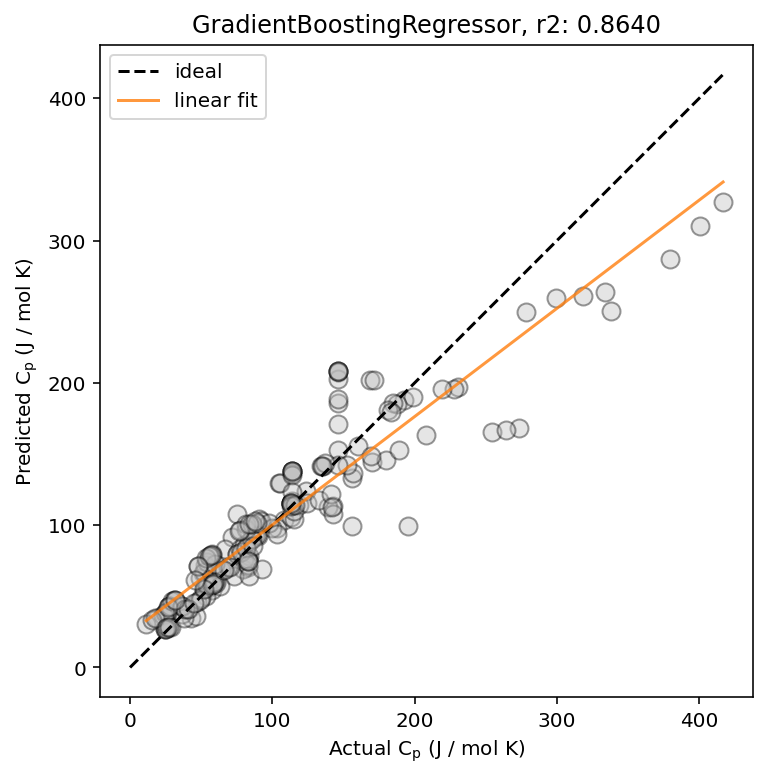

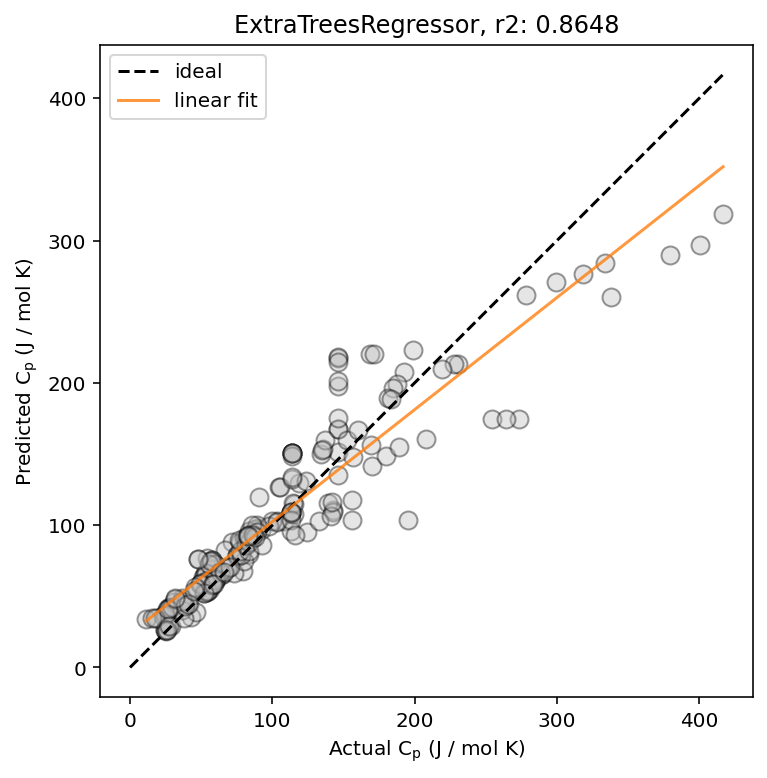

In [34]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']
    model = classic_models[model_name]
    y_act_val = y_val
    y_pred_val = model.predict(X_val)
    plot = plot_pred_act(y_act_val, y_pred_val, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')